In [1]:
import numpy as np
from matplotlib import pyplot as plt

Como as condições são mistas é necessário usar a série de senos de termos impares
Além disso, como o lado não isolado não vale 0 existe uma parte permanente na solução, que simplesmente vale T1

Assim temos que calcular os termos da série de senos de termos impares com f(x) - T1, com f(x) valendo T1 de 0 a 2L/3 e 0 de 2L/3 a L

Para calcular a série de senos impares temos de substituir L por 2L e ajustar os c e d. Além de substituir os ns por 2n+1

In [2]:
T1 = 10
L = 100

In [27]:
#f(x)
def calculacs1(ns):
    ks = (2*ns + 1)
    c = 0
    d = 1/3
    cn = (-4*(T1)/(np.pi*ks))*(np.cos(np.pi*ks*d)-np.cos(np.pi*ks*c))
    return cn

In [7]:
#Parte permanente
def calculacs2(ns):
    ks = (2*ns + 1)
    c = 0
    d = 1/2
    cn = (-4*(T1)/(np.pi*ks))*(np.cos(np.pi*ks*d)-np.cos(np.pi*ks*c))
    return cn

In [15]:
def soluchom(cs,ns,x,t):
    ks = (2*ns + 1)
    sine = np.sin(ks*np.pi*x/(2*L))*np.exp(-(ks**2*np.pi**2/(2*L)**2)*t)
    val = np.sum((sine*cs)) # parte transitóriarmanente
    val = val + T1 #parte permanente
    return val

In [20]:
n = 100
ns = np.arange(0,n)
ts = np.geomspace(1,20000, num= 9)
ts[0] = 0
xs = np.linspace(0,L,num=100)

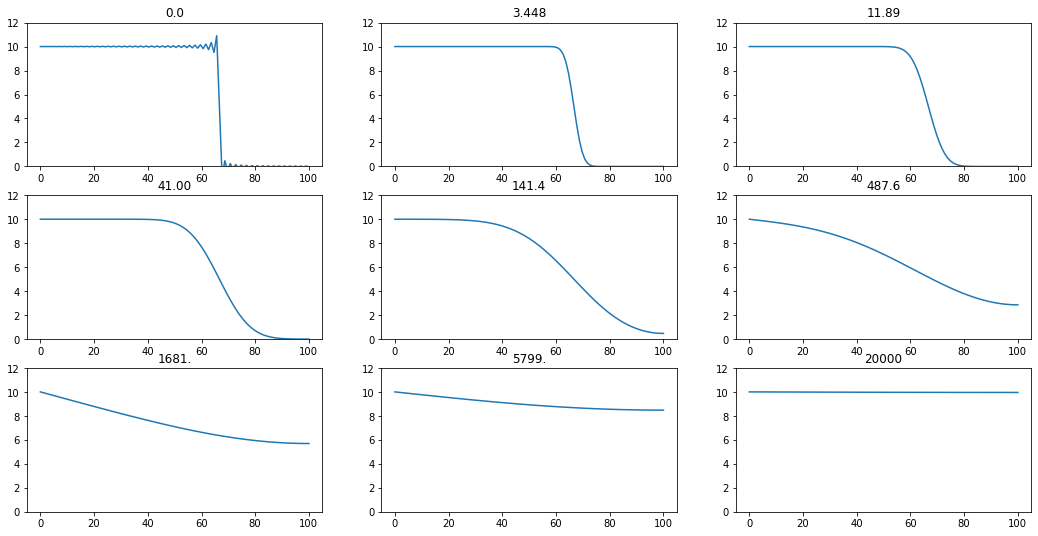

In [28]:
fig, axes = plt.subplots(3,3, figsize = (18,9))
k = 0
for i in range(0,3):
    for j in range(0,3):
        axes[i,j].plot(xs,[soluchom(calculacs1(ns)-calculacs2(ns),ns,x,ts[k]) for x in xs])
        axes[i,j].set_title(repr(ts[k])[0:5])
        axes[i,j].set_ylim(0,12)
        k +=1